# Сегментация клиентов банка по потреблению

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-статистических-показателей" data-toc-modified-id="Анализ-статистических-показателей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ статистических показателей</a></span></li><li><span><a href="#Визуализация-распределений-числовых-признаков.-Выбросы-и-аномалии" data-toc-modified-id="Визуализация-распределений-числовых-признаков.-Выбросы-и-аномалии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Визуализация распределений числовых признаков. Выбросы и аномалии</a></span></li><li><span><a href="#Портреты-уходящих-и-лояльных-клиентов" data-toc-modified-id="Портреты-уходящих-и-лояльных-клиентов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Портреты уходящих и лояльных клиентов</a></span></li><li><span><a href="#Анализ-влияния-признаков-на-целевой-показатель-оттока" data-toc-modified-id="Анализ-влияния-признаков-на-целевой-показатель-оттока-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ влияния признаков на целевой показатель оттока</a></span></li><li><span><a href="#Выделение-стратегически-важных-признаков" data-toc-modified-id="Выделение-стратегически-важных-признаков-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выделение стратегически важных признаков</a></span></li></ul></li><li><span><a href="#Сегментация-пользователей-по-потреблению" data-toc-modified-id="Сегментация-пользователей-по-потреблению-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сегментация пользователей по потреблению</a></span><ul class="toc-item"><li><span><a href="#Сегментация-клиентов-по-количеству-продуктов" data-toc-modified-id="Сегментация-клиентов-по-количеству-продуктов-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Сегментация клиентов по количеству продуктов</a></span></li><li><span><a href="#Дополнительная-сегментация-клиентов-с-1-продуктом" data-toc-modified-id="Дополнительная-сегментация-клиентов-с-1-продуктом-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Дополнительная сегментация клиентов с 1 продуктом</a></span><ul class="toc-item"><li><span><a href="#Целевые-клиенты-с-1-продуктом" data-toc-modified-id="Целевые-клиенты-с-1-продуктом-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Целевые клиенты с 1 продуктом</a></span></li></ul></li><li><span><a href="#Итоговая-сегментация-клиентов" data-toc-modified-id="Итоговая-сегментация-клиентов-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Итоговая сегментация клиентов</a></span></li></ul></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Сравнение-дохода-между-клиентами-с-1-и-2-продуктами" data-toc-modified-id="Сравнение-дохода-между-клиентами-с-1-и-2-продуктами-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Сравнение дохода между клиентами с 1 и 2 продуктами</a></span></li><li><span><a href="#Сравнение-уровня-оттока-между-клиентами-банка-разного-возраста" data-toc-modified-id="Сравнение-уровня-оттока-между-клиентами-банка-разного-возраста-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Сравнение уровня оттока между клиентами банка разного возраста</a></span></li></ul></li><li><span><a href="#Общие-выводы-и-рекомендации" data-toc-modified-id="Общие-выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общие выводы и рекомендации</a></span></li></ul></div>

Загрузим все необходимые для работы библиотеки и методы:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

# установка параметров отображения для графиков
custom_params = {'axes.spines.right': False, 'axes.spines.top': False}
sns.set_theme(style='whitegrid', rc=custom_params)

# сброс ограничений на число столбцов выводимой таблицы
pd.set_option('display.max_columns', None)

# убрать предупреждения Pandas
import warnings
warnings.filterwarnings('ignore')

## Обзор данных

Загрузим датасет и посмотрим на фрагмент данных из него, выведем общую информацию о таблице:

In [2]:
df = pd.read_csv(path)

display(df.head())
print('*' * 100)
print(df.info())
print('*' * 100)
print('Количество уникальных значений по столбцам:')
for col in df.columns:
    if df[col].nunique()<=3:
        print(f'{col}: {df[col].nunique()} {df[col].unique()}')
    else:
        print(f'{col}: {df[col].nunique()}')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn
0,258835,673,Ростов,Ж,32,0,467428.54,1,0,1,81011.65,True
1,96660,691,Ростов,Ж,31,3,65548.60,1,0,1,57005.02,True
2,99838,679,Ростов,Ж,30,1,686979.40,1,1,1,149687.98,True
3,216099,717,Рыбинск,Ж,25,2,1292171.92,1,0,1,19502.68,True
4,120240,744,Рыбинск,Ж,37,1,1390927.97,1,0,1,36861.24,True


****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  int64  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   equity         10000 non-null  int64  
 6   balance        7706 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  salary         10000 non-null  float64
 11  churn          10000 non-null  bool   
dtypes: bool(1), float64(2), int64(7), object(2)
memory usage: 947.3+ KB
None
*************************************************************************************************

В нашем распоряжении таблица из 10000 строк и 12 колонок, которые включают в себя следующие данные:
* `userid` — идентификатор пользователя (все уникальные),
* `score` — баллы кредитного скоринга,
* `city` — город (3 разных наименования),
* `gender` — пол,
* `age` — возраст,
* `equity` — приблизительная оценка собственности клиента,
* `balance` — баланс на счёте,
* `products` — количество продуктов, которыми пользуется клиент,
* `credit_card` — есть ли кредитная карта,
* `last_activity` — был ли клиент активен последнее время,
* `salary` — заработная плата клиента,
* `churn` — уходит или нет.

**Вывод**

Обзор данных осуществлен. На шаге предобработки будем приводить наименования колонки с идентификатором пользователя в "змеиный регистр", менять тип данных у столбца с оттоком. В столбце с балансом на счёте определяются пропущенные значения, с которыми надо разобраться. В целом, предоставленных данных достаточно для выполнения целей проекта.

## Предобработка данных

Подготовим таблицу к дальнейшей работе: сначала формальные изменения и проверки:

In [3]:
# меняем название колонки
df = df.rename(columns={'userid': 'user_id'})

# меняем тип данных с bool на int
df['churn'] = df['churn'].apply(lambda x: 1 if x else 0)

# проверка дубликатов
print(f'Количество дубликатов строк: {df.duplicated().sum()}')

# проверка пропусков в столбце 'balance'
print(f"Пропусков в столбце 'balance': {df.balance.isna().sum()} шт.")
print(f"Пропусков в столбце 'balance': {round(df.balance.isna().sum() / len(df) * 100)}%")

Количество дубликатов строк: 0
Пропусков в столбце 'balance': 2294 шт.
Пропусков в столбце 'balance': 23%


Пропущенных значений баланса средств много, попробуем разобраться в причинах их возникновения. Сначала посмотрим, какое минимальное значение баланса мы имеем:

In [4]:
df['balance'].min()

219.76

Нулей нет вообще, и это странно, поскольку есть куча банковских продуктов, которые допускают нулевой баланс: текущий счет, вклад "до востробования" и пр. При этом современные модели банковского обслуживания основаны именно на обязательном открытии любому новому клиенту текущего счета + часто с выдачей карты, через которую клиент взаимодействует с банком. Скорее всего, NaN в датасете - это и есть 0.

Выделим целевые строки с пропусками, объединим по отдельным признакам и посмотрим на число пропусков в группах: 

In [5]:
# смотрим пропуски по группам значений категориальных признаков
for element in  ['city', 'gender', 'products', 'credit_card', 'last_activity', 'churn']:
    display(df.loc[df['balance'].isna()].groupby(element)['user_id'].count().reset_index())

,city,user_id
0,Ростов,239
1,Рыбинск,577
2,Ярославль,1478


,gender,user_id
0,Ж,1011
1,М,1283


,products,user_id
0,1,2280
1,2,14


,credit_card,user_id
0,0,8
1,1,2286


,last_activity,user_id
0,0,1051
1,1,1243


,churn,user_id
0,0,2294


Видим, что пропуски в балансе наблюдаются у клиентов, которые продолжают обслуживаться в банке, при этом почти все из них имеют кредитную карту, и почти для всех эта карта является единственным продуктом.

Далее мы будем изучать портрет среднестатистического клиента, и если NaN оставить, то это будет не любой клиент, а условно клиент-вкладчик. NaNы отбросятся, и средняя сумма баланса посчитается только по тем, у кого этот баланс есть. А это уже не среднестатистический клиент. В общем, я принимаю решение заменить все NaN-ы на нули и впоследствии это нулевое значение трактовать как "этот клиент не имеет никакого депозитного продукта":

In [6]:
# фильтруем таблицу и меняем значения в целевом столбце
df.loc[df['balance'].isna(), 'balance'] = 0

print(f"Осталось пропусков в столбце 'balance': {df.balance.isna().sum()} шт.")

Осталось пропусков в столбце 'balance': 0 шт.


Методом one-hot произведем перекодировку значений в столбцах с категориальными переменными (пол и город), сохранив при этом оригинальные столбцы (для построения графиков будет проще использовать оригинальные названия столбцов, а для вывода статистических показателей, построения профилей клиентов, расчета корреляций - перекодированные):

In [7]:
# делаем копии столбцов для сохранения в них оригинальных значений
df['gender_origin'] = df['gender']
df['city_origin'] = df['city']

# производим перекодировку выбранных столбцов
df = pd.get_dummies(df, columns=['city','gender'])

**Вывод**

Произведены незначительные изменения в датасете для удобства дальнейшей работы. Заполнены пропущенные значения. Произведена перекодировка категориальных признаков. Данные готовы к исследовательскому анализу.

## Исследовательский анализ данных

### Анализ статистических показателей

Изучим статистические показатели по всем числовым столбцам:

In [8]:
# выводим статистические показатели
df.drop(columns=['user_id']).describe().T.style.format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
score,10000.00,603.58,132.18,300.00,506.00,610.00,713.00,850.00
age,10000.00,42.84,12.13,18.00,34.00,40.00,51.00,86.00
equity,10000.00,1.75,1.71,0.00,0.00,1.00,3.00,9.00
balance,10000.00,600787.69,1874688.83,0.00,25047.03,268677.72,771976.43,126385904.82
products,10000.00,1.12,0.41,0.00,1.00,1.00,1.00,4.00
credit_card,10000.00,0.84,0.36,0.00,1.00,1.00,1.00,1.00
last_activity,10000.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
salary,10000.00,95468.12,132573.68,380.84,31449.29,63440.57,108795.85,1378131.45
churn,10000.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00
city_Ростов,10000.00,0.14,0.35,0.00,0.00,0.00,0.00,1.00


Анализ данной таблицы:
* по столбцам с числовыми признаками можно понять, что медианные значения меньше средних, значит распределения имеют длинный правый хвост (есть клиенты с очень высокими значениями показателей). Подробнее опишем числовые признаки после визуализации их распределений
* по столбцам с бинарными признаками можно понять, что:
    * мужчин и женщин в датасете примерно поровну
    * активных и неактивных клиентов также примерно поровну
    * кредитную карту имеют 84% клиентов
    * 59% клиентов из Ярославля, 27% - из Рыбинска и 14% - из Ростова
    * среднее кол-во продуктов у клиента 1.12, при этом медиана 1. Дополнительно надо исследовать строки, где продуктов 0.
    * **14% клиентов уходят в отток** - целевой показатель нашего исследования

Общее наблюдение: у переменных довольно разные по величине стандартные отклонения. Это говорит о том, что если будем применять методы машинного обучения, то будет лучше их стандартизировать перед обучением.

### Визуализация распределений числовых признаков. Выбросы и аномалии

На предыдущем этапе заметили, что в датасете есть строки с нулевым количеством продуктов, что очень нелогично. Посмотрим детальнее:

In [9]:
# фильтрация через логическую индексацию
df.loc[df['products'] == 0]

,user_id,score,age,equity,balance,products,credit_card,last_activity,salary,churn,gender_origin,city_origin,city_Ростов,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
408,261907,620,79,3,594470.42,0,0,0,25063.96,1,Ж,Рыбинск,0,1,0,1,0


Это всего 1 клиент, который заявил о намерении уйти, при этом имеет положительный остаток средств на счете, т.е. как минимум у него есть 1 продукт (депозит/текущий счет). Заменим число продуктов на единицу:

In [10]:
df.loc[df['products'] == 0, 'products'] = 1

Далее проверим остальные числовые признаки. Напишем функцию для вывода гистограммы и боксплота, а также функцию, которая рассчитает границы распределения ("усы" боксплота) и даст ориентиры для отсечения выбросов:

In [11]:
def build_picture(data, column, xlim, bins='auto'):
    '''
    Функция для отрисовки гистограммы распределения и диаграммы размаха.
    Принимает на вход датафрейм, название колонки с целевой переменной
    и значение правой границы (по оси X).
    '''
    fig = plt.figure(figsize=(13, 3)) # размер графика
    
    ax1 = fig.add_subplot(1,2,1) # положение графика внутри области для рисования
    ax2 = fig.add_subplot(1,2,2)
    
    ax1.set_title(f'Гистограмма для {column}') # заголовок графика
    ax2.set_title(f'Боксплот для {column}')

    sns.histplot(x=column, data=data, bins=bins, kde=True, color='#0066CC', ax=ax1) # построение гистограммы
    sns.boxplot(x=column, data=data, color='#0066CC', ax=ax2) # построение боксплота
    
    ax1.set_xlim(0, xlim) # ограничение вывода по оси X
    ax2.set_xlim(0, xlim)
    
    fig.tight_layout() # устранение наложения графиков
    plt.show()

    
def whiskers(data, column):
    '''
    Функция для расчета границ диаграммы размаха (усов боксплота).
    Принимает на вход датафрейма и название колонки с целевой переменной.
    '''
    left_whisker = max(
        data[column].min(),
        data[column].quantile(0.25) - 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25))
    )
    
    right_whisker = min(
        data[column].max(),
        data[column].quantile(0.75) + 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25))
    )
    
    loss_left = round(100 - len(data.query(f"{column} >= {left_whisker}")) / len(data) * 100, 1)
    loss_right = round(100 - len(data.query(f"{column} <= {right_whisker}")) / len(data) * 100, 1)
    
    print(f"Границы распределения для {column}: {left_whisker, right_whisker}")
    print(f"Потеря данных при отсечении по левой границе: {loss_left}%")
    print(f"Потеря данных при отсечении по правой границе: {loss_right}%")

Последовательно выведем и опишем распределения отдельных числовых признаков (не будем трогать число объектов в собственности, поскольку анализ минимумов и максимумов не показал каких-то аномальных значений):

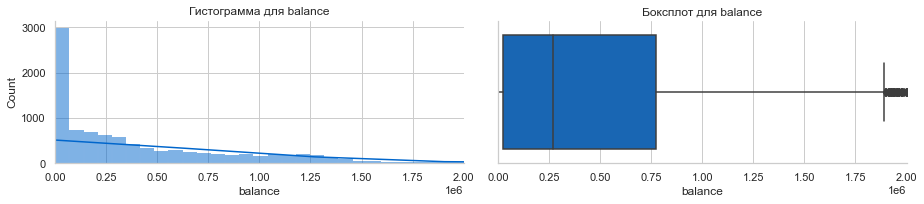

Границы распределения для balance: (0.0, 1892370.5224999997)
Потеря данных при отсечении по левой границе: 0.0%
Потеря данных при отсечении по правой границе: 5.0%


In [12]:
build_picture(df, 'balance', 2000000)
whiskers(df, 'balance')

Распределение данных по остатку собственных средств имеет положительную ассиметрию за счет присутствия очень больших значений, при этом наблюдается много нулевых остатков, которые мы ввели при заполнении NaN. Я бы сказала, что распределение похоже на экспененциальное (логично для этой величины), но kde нарисовал прямую. Если отсечем выбросы по границам распределения, то потеряем 5% данных, немало.

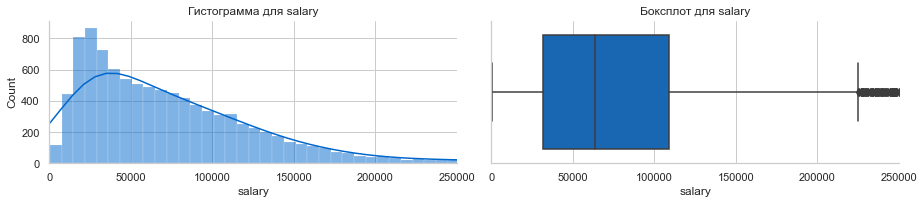

Границы распределения для salary: (380.84, 224815.68625)
Потеря данных при отсечении по левой границе: 0.0%
Потеря данных при отсечении по правой границе: 5.8%


In [13]:
build_picture(df, 'salary', 250000)
whiskers(df, 'salary')

Распределение данных по зарплате также имеет положительную ассиметрию за счет присутствия очень больших значений. Распределение похоже на логарифмическое, логично для этой величины. Если отсечем выбросы по границам распределения, то потеряем почти 6% данных, немало.

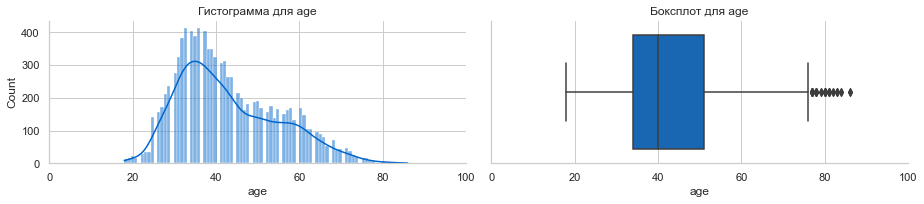

Границы распределения для age: (18, 76.5)
Потеря данных при отсечении по левой границе: 0.0%
Потеря данных при отсечении по правой границе: 0.4%


In [14]:
build_picture(df, 'age', 100, df['age'].max())
whiskers(df, 'age')

Распределение данных по возрасту напоминает нормальное с положительной ассиметрией - в нашем банке преобладают "зрелые" клиенты, что логично. Отсечение выбросов по рекомендованным границам не приведет к большой потере данных.

При возникновении необходимости отсечь выбросы сможем ориентироваться на рассчитанные пороги для признаков, пока оставим все как есть.

### Портреты уходящих и лояльных клиентов

Теперь попробуем составить среднестатистические портреты уходящих и лояльных клиентов (в описании показателей буду применять термин "средний", хотя по некоторым показателем будет медиана, но сразу ориентируюсь на непогруженного слушателя будущей презентации):

In [15]:
df.groupby('churn') \
  .agg({'user_id': 'count',
        'age': 'median',
        'gender_М': 'mean',
        'gender_Ж': 'mean',
        'city_Ярославль': 'mean',
        'city_Рыбинск': 'mean',
        'city_Ростов': 'mean',
        'salary': 'median',
        'equity': 'median',
        'score': 'median',
        'products': 'mean',
        'credit_card': 'mean',
        'balance': 'median',
        'last_activity': 'mean'        
  }).T.style.format('{:.2f}')

churn,0,1
user_id,8563.00,1437.00
age,41.00,37.00
gender_М,0.48,0.61
gender_Ж,0.52,0.39
city_Ярославль,0.58,0.65
city_Рыбинск,0.28,0.21
city_Ростов,0.14,0.14
salary,60043.72,82117.28
equity,1.00,3.00
score,581.00,726.00


**Лояльные клиенты:**

* наибольший по численности сегмент - около 86% базы
* средний возраст 41 год
* мужчин - 48%, женщин - 52%
* город проживания: Ярославль - 58%, Рыбинск - 28%, Ростов - 14%
* средняя заработная плана 60 тыс. руб.
* в собственности, в среднем, 1 объект
* оцениваются невысоким баллом кредитного скоринга, средний балл 581 (для получения кредита желательно получить более 600)
* имеют в среднем 1.06 продукта
* 89% имеют кредитную карту
* средний остаток собственных средств около 207 тыс.руб.
* 44% проявляют активность в последнее время

**Уходящие клиенты:**

* сегмент составляет около 14% базы
* средний возраст 37 лет
* мужчин - 61%, женщин - 39%, пропорция сдвинута в пользу мужчин
* город проживания: Ярославль - 65%, Рыбинск - 21%, Ростов - 14%, пропорция сдвинута в пользу Ярославля
* средняя заработная плана 82 тыс. руб.
* в собственности, в среднем, 3 объекта
* оцениваются высоким баллом кредитного скоринга, средний балл 726
* имеют в среднем 1.44 продукта
* 54% имеют кредитную карту
* средний остаток собственных средств около 995 тыс.руб.
* 85% проявляют активность в последнее время, на 41 п.п. более активны

Таким образом, уходящие клиенты более молоды, более состоятельны, имеют больше шансов получить кредит, при этом реже являются владельцами кредитных карт банка, в среднем имеют больше продуктов, остаток их собственных средств почти в 5 раз выше, чем у лояльных, и они намного активнее взаимодействуют с банком. Пропорция сдвинута в пользу мужчин, и в пользу клиентов из Ярославля.

### Анализ влияния признаков на целевой показатель оттока

Нам необходимо понять стратегически важные признаки, наиболее сильно влияющие на отток. Для начала выведем коэффициенты корреляции признаков датасета с целевым показателем оттока:

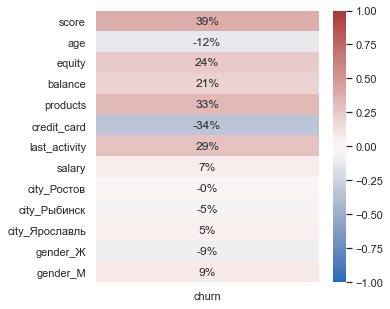

In [16]:
# строим тепловую карту, берем из нее только столбец с целевой переменной оттока
fig = plt.figure(figsize=(5, 5))
sns.heatmap(
    df.drop(columns='user_id').corr().loc[:, ['churn']].drop('churn'),
    vmin= -1, vmax=1,
    fmt='.0%',
    annot=True,
    cmap='vlag'
)
plt.show()

Видим, что значимой корреляции не наблюдается ни по одному признаку, наиболее высокие коэффициенты у оттока с баллами кредитного скоринга, наличием кредитной карты, количеством продуктов, активностью клиента, оценкой собственности и остатком собственных средств.

Визуализируем влияние признаков на отток: применять будем гистограммы с нормированием значений различные по виду для разных типов данных.

In [17]:
# создаем вспомогательную функцию для построения гистограмм
def build_hist_norm(data, column, bins='auto'):
    '''
    Функция для построения нормированных гистограмм для непрерывных переменных.
    Выводит два распределения в зависимости от значения целевой переменной оттока.
    На вход принимает датасет, название колонки со значениями признака и число корзин
    '''
    plt.figure(figsize=(15, 5))
    sns.histplot(x=column,
                 data=data,
                 bins=bins,
                 hue='churn',
                 stat='probability',
                 common_norm=False,
                 palette = ['#0066CC', '#990000']
                )
    plt.title(f'Распределение значений {column}')
    plt.legend(['churn', 'not_churn'])
    plt.show()

Сначала посмотрим распределения непрерывных и дискретных признаков, имеющих большое количество уникальных значений. Будем выводить каждый график отдельно (не циклом) для удобства его изучения. Графики будут достаточно крупными, чтобы иметь возможность сразу же настроить категоризацию данных:

**SCORE**

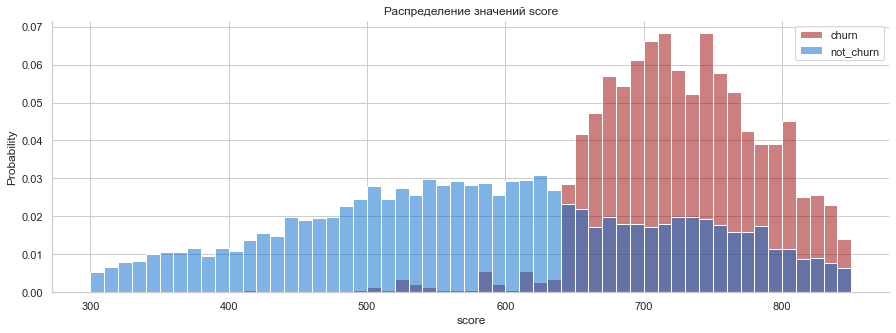

In [18]:
# построение нормализованных гистограмм для score
build_hist_norm(df, 'score', bins=range(df['score'].min(), df['score'].max()+10, 10))

Видим, что при кредитном рейтинге более 640 баллов доля уходящих клиентов начинает стабильно превышать долю лояльных. Делаем категоризацию значений в поле `score`:

In [19]:
# создаем новый столбец с категориями числового признака
df['score_category'] = df['score'].apply(lambda x: 'до 640 баллов' if x < 640 else 'от 640 баллов')

**BALANCE**

В этом столбце меняли NaN-ы на нули, из них сделаю отдельную категорию, а для ненулевых посмотрю гистограммы:

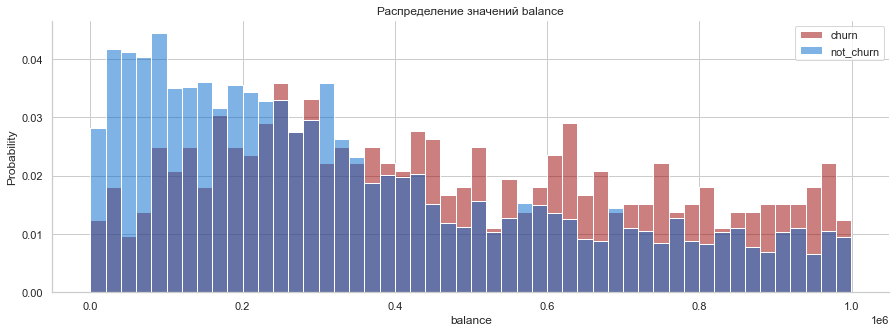

In [20]:
# построение нормализованных гистограмм для balance
build_hist_norm(df.loc[(df['balance'] <= 1000000) & (df['balance'] > 0)], 'balance', 50)

С остатка от 360 тыс.руб. начинается стабильное превышение доли уходящих клиентов, категоризацию ненулевых значений в поле `balance` можно сделать более понятной по границе 350 тыс.руб.

In [21]:
# создаем новый столбец с категориями числового признака
def balance_category (balance):
    '''
    Функция для категоризации баланса средств.
    Принимает на вход значение баланса, возвращает его категорию
    '''
    if balance == 0:
        balance_category = 'нет собств.средств'
    elif balance < 350000:
        balance_category = 'до 350 тыс.'
    else:
        balance_category = '350 тыс. и более'
    
    return balance_category

df['balance_category'] = df['balance'].apply(balance_category)

**AGE**

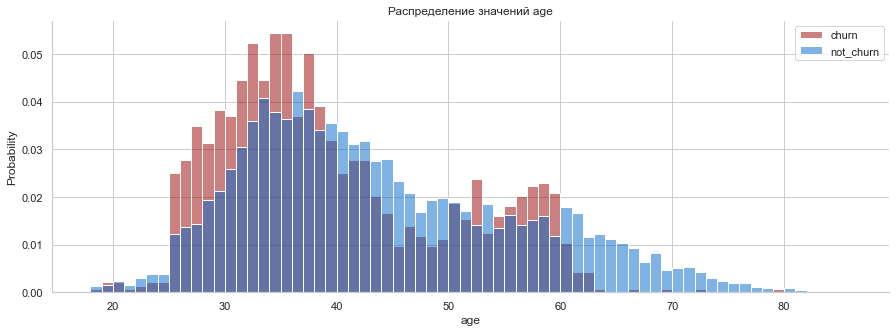

In [22]:
# построение нормализованных гистограмм для age
build_hist_norm(df, 'age', df['age'].nunique())

Видим следующие высокооточные диапазоны: 25-38 лет и 52-59 лет. Для более удобного использования категоризации клиентов на практике лучше выбрать более понятные диапазоны, например, группировки по десяткам лет:

In [23]:
# создаем новый столбец с категориями числового признака
def age_category (age):
    '''
    Функция для категоризации возраста.
    Принимает на вход значение возраста, возвращает его категорию
    '''
    if age < 30:
        age_category = 'до 30 лет'
    elif age < 40:
        age_category = '30-39 лет'
    elif age < 50:
        age_category = '40-49 лет'
    elif age < 60:
        age_category = '50-59 лет'
    else:
        age_category = 'от 60 лет'
    
    return age_category

df['age_category'] = df['age'].apply(age_category)

**SALARY**

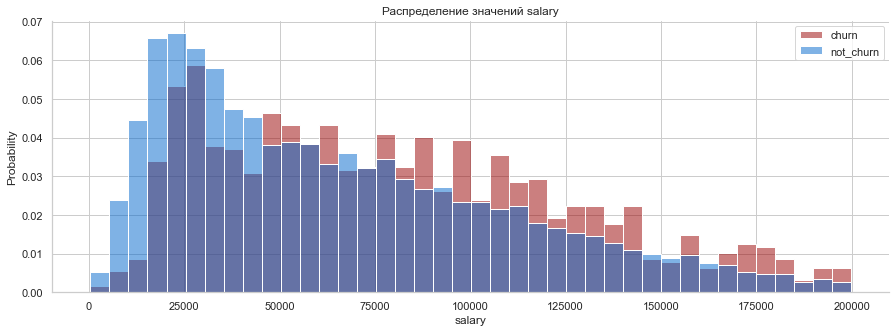

In [24]:
# построение нормализованных гистограмм для salary
build_hist_norm(df.loc[df['salary'] <= 200000], 'salary', 40)

Категоризацию значений в поле `salary` можно сделать по границе 45 тыс.руб., когда начинается стабильное превышение доли уходящих клиентов:

In [25]:
# создаем новый столбец с категориями числового признака
df['salary_category'] = df['salary'].apply(lambda x: 'до 45 тыс.' if x < 45000 else '45 тыс. и выше')

**EQUITY**

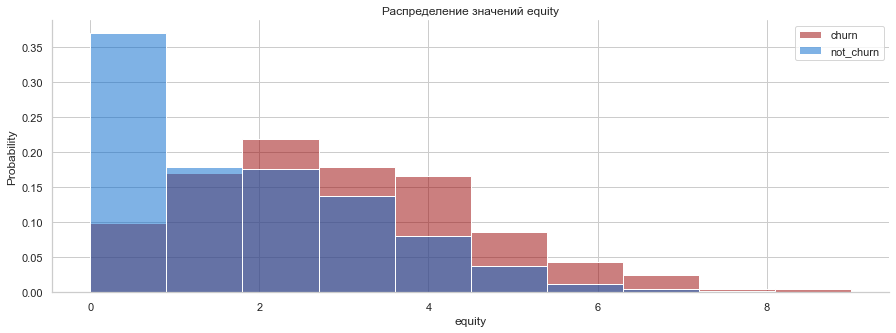

In [26]:
# построение нормализованных гистограмм для equity
build_hist_norm(df, 'equity', df['equity'].nunique())

Категоризацию значений в поле `equity` можно сделать по границе 2 объекта, когда начинается стабильное превышение доли уходящих клиентов:

In [27]:
# создаем новый столбец с категориями числового признака
df['equity_category'] = df['equity'].apply(lambda x: 'до 2 объектов' if x < 2 else '2 объекта и больше')

Теперь посмотрим и опишем распределения остальных признаков. Дополнительные категории в них выделять не надо, поэтому можно все графики построить вместе и сделать их более компактными. Кроме этого, добавим к этим графикам категоризированные ранее числовые признаки, чтобы иметь полную картину:

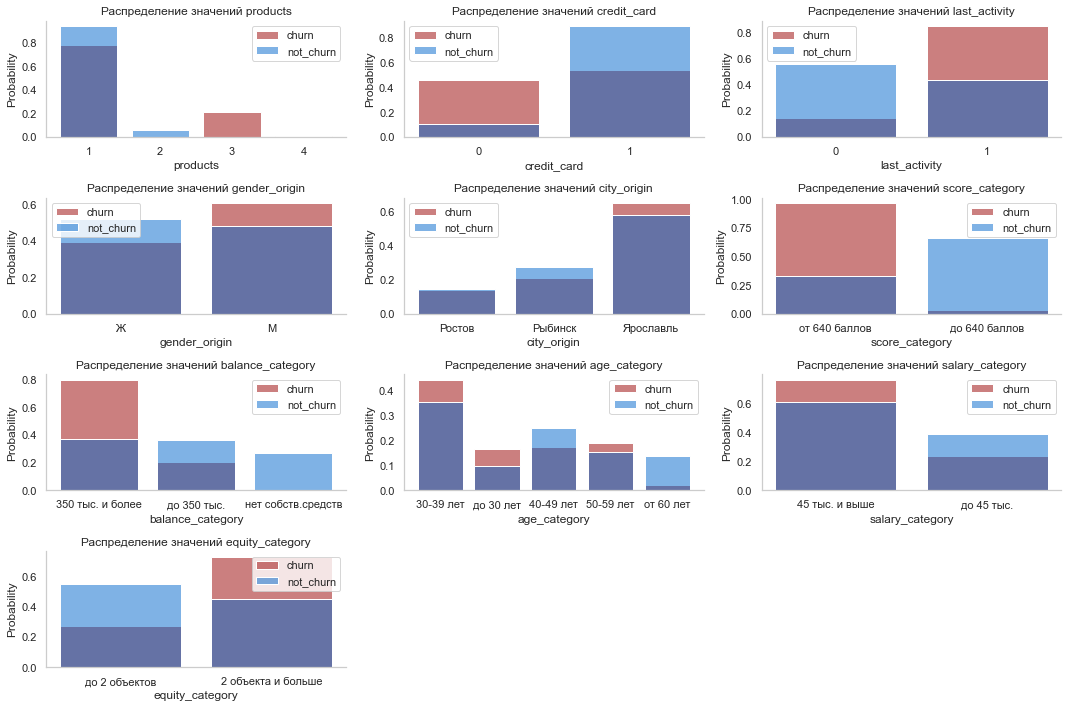

In [28]:
#создание списка признаков для цикла
tmp_list = ['products', 'credit_card', 'last_activity', 'gender_origin', 'city_origin',
            'score_category', 'balance_category', 'age_category',
            'salary_category', 'equity_category']

#строим графики
fig = plt.figure(figsize=(15,10))

for i in range(len(tmp_list)):
    axi = fig.add_subplot(4,3,i+1)
    sns.histplot(x=tmp_list[i],
                 data=df,
                 bins=df[tmp_list[i]].nunique(),
                 hue='churn',
                 stat='probability',
                 common_norm=False,
                 palette = ['#0066CC', '#990000'],
                 discrete=True,
                 shrink=.8,
                 ax=axi
                )
    plt.title(f'Распределение значений {tmp_list[i]}')
    plt.xticks(df[tmp_list[i]].unique())
    plt.legend(['churn', 'not_churn'])
    plt.grid(visible=False)
    
fig.tight_layout()
plt.show()

Выводы из этих графиков:

* Клиенты с 3 и 4 продуктами полностью уходят, при в сегменте клиентов с 2 продуктами оттока нет вообще
* Клиенты, не имеющие кредитную карту - более отточный сегмент.
* Клиенты, активно взаимодействующие с банком - более отточный сегмент.
* Мужчины более склонны к уходу, чем женщины.
* Клиенты из Ярославля более склонны к уходу, чем клиенты из Рыбинска и Ростова.
* Клиенты с хорошим кредитным рейтингом от 640 баллов - более отточный сегмент.
* Клиенты с остатком собственных средств от 360 тыс.руб. - более отточный сегмент.
* Есть несколько категорий возраста клиентов, которые более подвержены оттоку: до 30 лет, от 30 до 39 лет и 50-59 лет.
* Клиенты с зарплатой от 45 тыс.руб. - более отточный сегмент.
* Клиенты, обладающие 2 и более объектами в собственности более склонны к оттоку.

Теперь посмотрим на количество клиентов в каждом из промежуточных сегментов (внутри одного признака) и долю уходящих клиентов в них:

In [29]:
# смотрим средние оттоки по сегментам, основанным только на одном признаке
for element in tmp_list:
    tmp = df.groupby(element).agg({'churn': ['count', 'mean']})
    tmp.columns = ['count', 'avg_churn']
    tmp.insert(1, 'count_ratio', tmp['count'] / tmp['count'].sum())
    display(tmp.style.format({'avg_churn':'{:.1%}', 'count_ratio':'{:.0%}'}) \
                     .highlight_max(color='#BF3030')
           )

,count,count_ratio,avg_churn
products,,,
1,9162,92%,12.3%
2,524,5%,0.0%
3,306,3%,100.0%
4,8,0%,100.0%


,count,count_ratio,avg_churn
credit_card,,,
0,1577,16%,42.0%
1,8423,84%,9.2%


,count,count_ratio,avg_churn
last_activity,,,
0,5002,50%,4.3%
1,4998,50%,24.4%


,count,count_ratio,avg_churn
gender_origin,,,
Ж,4992,50%,11.3%
М,5008,50%,17.4%


,count,count_ratio,avg_churn
city_origin,,,
Ростов,1431,14%,14.0%
Рыбинск,2663,27%,11.2%
Ярославль,5906,59%,15.9%


,count,count_ratio,avg_churn
score_category,,,
до 640 баллов,5749,57%,0.8%
от 640 баллов,4251,43%,32.7%


,count,count_ratio,avg_churn
balance_category,,,
350 тыс. и более,4312,43%,26.6%
до 350 тыс.,3394,34%,8.6%
нет собств.средств,2294,23%,0.0%


,count,count_ratio,avg_churn
age_category,,,
30-39 лет,3700,37%,17.3%
40-49 лет,2409,24%,10.4%
50-59 лет,1605,16%,17.1%
до 30 лет,1082,11%,22.4%
от 60 лет,1204,12%,2.7%


,count,count_ratio,avg_churn
salary_category,,,
45 тыс. и выше,6306,63%,17.3%
до 45 тыс.,3694,37%,9.3%


,count,count_ratio,avg_churn
equity_category,,,
2 объекта и больше,4911,49%,21.4%
до 2 объектов,5089,51%,7.6%


### Выделение стратегически важных признаков

Для будущей сегментации клиентов необходимо определить стратегически важные признаки, влияющие на отток:
* **количество продуктов** - стратегический признак: костяк базы составляют клиенты с 1 продуктом, клиенты с 2 продуктами не уходят вообще, а с 3-4 продуктами уходят полностью;
* **наличие кредитной карты** - статегический признак: наличие кредитной карты с загруженным лимитом позволяет "привязать" клиента к банку как минимум до момента возврата израсходованных кредитных средств;
* **баллы кредитного скоринга** - стратегический признак. Клиенту с высоким баллом и хорошей кредитной историей намного проще перекредитоваться на более выгодных условиях;
* **баланс собственных средств** - стратегический признак: наблюдаем отток клиентов с остатками более 350 тысяч;
* **возраст клиента** - стратегический признак: способы удержания для молодых и зрелых людей могут сильно различаться в зависимости от ценности для клиента предлагаемого продукта/услуги;
* активность клиента - с одной стороны, сегмент активных клиентов более высокоотточный, и с активными клиентами банку проще взаимодействовать в части реализации инициатив и продажи дополнительных продуктов. С другой стороны, активность сама собой не зарождается: она идет от продукта, который клиент купил. Поэтому пока не вносим активность в список стратегических признаков;
* зарплату и количество объектов в собственности пока оставляем за кадром. Они могут пригодится как маркеры "состоятельности" клиента, но напрямую на них повлиять мы не можем. Кроме того, мы уже выбрали в качестве стратегического показателя баллы кредитного скоринга, через который в том числе отражается и зарплата, и собственность;
* пол клиента тоже пока оставляем за кадром, не сильно большая разница в оттоке. Кроме того, в современном обществе история про гендерное неравенство при разработке конкретных мероприятий может прозвучать возмутительно;
* сильно большой разницы в оттоках по разным городам не видно, поэтому город тоже не рассматриваем. Кроме того, разворачивать маркетинговую кампанию в разных городах с разными условиями, либо делать разные настройки продуктов в зависимости от города технически сложно и нецелесообразно.

## Сегментация пользователей по потреблению

### Сегментация клиентов по количеству продуктов

Посмотрим на различия средних/медианных показателей по группам клиентов, которые владеют разным количеством продуктов (города проживания брать не будем - непоказательный параметр, т.к. основной бизнес у банка в Ярославле, и этот город будет преобладать в каждом сегменте):

In [30]:
df.groupby('products') \
  .agg({'user_id': 'count',
        'churn': 'mean',
        'age': 'median',
        'gender_М': 'mean',
        'gender_Ж': 'mean',
        'salary': 'median',
        'equity': 'median',
        'score': 'median',
        'credit_card': 'mean',
        'balance': 'median',
        'last_activity': 'mean'        
  }).T.style.format('{:.2f}')

products,1,2,3,4
user_id,9162.00,524.00,306.00,8.00
churn,0.12,0.00,1.00,1.00
age,40.00,43.00,39.00,38.50
gender_М,0.50,0.45,0.65,0.62
gender_Ж,0.50,0.55,0.35,0.38
salary,64482.48,31107.55,93367.95,108395.92
equity,1.00,2.00,3.00,3.50
score,608.00,576.50,734.50,719.00
credit_card,0.83,0.90,0.97,1.00
balance,244735.20,553743.08,1310174.38,1228741.79


Составим типичные портреты пользователей по количеству продуктов (в описании буду применять термин "средний", хотя по некоторым показателем будет медиана, но сразу ориентируюсь на непогруженного слушателя будущей презентации):

**Клиенты с 3-4 продуктами:**
* наименьший по численности сегмент (около 3% от базы)
* все клиенты уходят в отток
* средний возраст около 39 лет
* мужчин в 1.5 раза больше, чем женщин
* средняя заработная плата 93 - 108 тыс.руб.
* в собственности, в среднем, 3-4 объекта
* оцениваются максимальным среди остальным средним баллом кредитного скоринга
* почти все являются владельцами кредитных карт
* средний остаток собственных средств на счете 1.2 - 1.3 млн.руб.
* в последнее время были наиболее активны

**Клиенты с 2 продуктами:**
* небольшой по численности сегмент (около 5% от базы)
* ни один из клиентов не уходит в отток
* средний возраст 43 года
* мужчин на 5 п.п. меньше, чем женщин
* средняя зарплата 31 тыс.руб.
* в собственности, в среднем, 2 объекта
* наименьший среди остальный групп средний скоринговый баллом 576 (для одобрения кредита лучше всего получить более 600)
* 90% являются пользователями кредитных карт
* средний остаток собственных средств на счете 553 тыс.руб.
* сегмент наименее активен

**Клиенты с 1 продуктом:**
* наибольший по численности сегмент, костяк всей базы (около 92% от базы)
* 12% клиентов уходит в отток
* средний возраст 40 лет
* мужчин и женщин поровну
* средняя зарплата 64 тыс.руб.
* в собственности, в среднем, 1 объект
* половина клиентов оценивается скоринговым баллом более 608 (приемлемый для получения кредита)
* 83% являются пользователями кредитных карт
* средний остаток собственных средств на счете 245 тыс.руб.
* клиенты делятся 50/50 между активными и неактивными

Описание всех сегментов клиентов и предположения о причинах их лояльности/нелояльности к банку приведем ниже после дополнительной сегментации клиентов с 1 продуктом.

### Дополнительная сегментация клиентов с 1 продуктом

Рассмотрим сегмент клиентов с 1 продуктом. Мы уже знаем как минимум 3 признака, которыми можно описать низкоотточные сегменты:
* скоринговый балл ниже 640 баллов - доля оттока 1%
* нет собственных средств - доля оттока 0%
* возраст от 60 лет - доля оттока 3%.

Таким образом, если мы возьмем клиентов, которые будут обладать одновременно каждым их трех признаков высокого оттока ("наиболее отточные из отточных"), то получим датафрейм, содержащий основную часть уходящих клиентов, а также остающихся клиентов со схожими признаками. Это и будут наши **целевые клиенты с 1 продуктом**, на которых необходимо в первую очередь направить усилия по сдерживанию оттока и удержанию. Оставшиеся клиенты в группе клиентов с 1 продуктом будут являться низкоотточным сегментом, назовем их **нецелевые клиенты с 1 продуктом**.

In [31]:
# создаем датафрейм с показателями целевых клиентов с 1 продуктов
df_new = df.query("products==1 and score>=640 and balance>0 and age<60")

# общее кол-во клиентов с 1 продуктом, кол-во и доля уходящих
total = len(df.query('products==1'))
ch_total = df.query('products==1 and churn==1')['user_id'].count()
ch_total_r = df.query('products==1')['churn'].mean()
# общее кол-во целевых клиентов с 1 продуктом, кол-во и доля уходящих
target = len(df_new)
ch_target = df_new.query('churn==1')['user_id'].count()
ch_target_r = df_new['churn'].mean()
                  
print(f"Количество клиентов c 1 продуктом: {total}")
print(f"\t из них 'отточные': {ch_total} или {ch_total_r:.0%}")

print(f"\nКоличество целевых клиентов c 1 продуктом: {target}")
print(f"\t из них 'отточные': {ch_target} или {ch_target_r:.0%}")
                  
print(f"\nКоличество нецелевых клиентов c 1 продуктом: {total - target}")
print(f"\t из них 'отточные': {ch_total - ch_target} или \
{(ch_total - ch_target)/(total - target):.0%}")

Количество клиентов c 1 продуктом: 9162
	 из них 'отточные': 1123 или 12%

Количество целевых клиентов c 1 продуктом: 3334
	 из них 'отточные': 1096 или 33%

Количество нецелевых клиентов c 1 продуктом: 5828
	 из них 'отточные': 27 или 0%


*Можно было бы в виде сводной таблицы показать ветвления группы клиентов с 1 продуктом по использованным в фильтре стратегическим признакам score, balance и age, но эта таблица будет слишком длинная и многострочная, поэтому здесь я пошла более компактным путем, а вот дальше уже буду "навешивать" доп.признаки в виде таблиц*

Нецелевые клиенты с 1 продуктом, также как и клиенты с 2 продуктами пока остаются вне рамок будущих мероприятий, направленных на повышение активности. Однако при опеределенных условиях на них также можно будет распространить отдельные нововведения в превентивных целях. Об этом напишу позднее в блоке рекомендаций. Приступаем к итоговому анализу целевых клиентов с 1 продуктом.

#### Целевые клиенты с 1 продуктом

Логика анализа этой группы клиентов будет такой:
* чтобы понять тип используемого продукта, следующее ветвление проведем по признаку наличия кредитной карты
* далее будем проверять влияние на отток стратегических признаков (баланс и возраст по оставшимся категориям), после чего получим несколько дополнительных сегментов клиентов, по которым и сформируем рекомендации для маркетологов

Поделим всех клиентов на 2 группы по признаку наличия кредитной карты:

In [32]:
df_new.groupby('credit_card') \
      .agg({'churn': ['count', 'sum', 'mean']}) \
      .style.format({('churn', 'mean'):'{:.0%}'}).highlight_max(color='#BF3030')

Видим, что клиенты примерно в пропорции 1:2 разделились на группы, при этом (как и на этапе EDA) понятно, что доля оттока у держателей кредитных карт будет выше. Можно предположить, что неудовлетворенность держателей кредитных карт и их склонность к оттоку ниже, потому что сам продукт лучше, чем депозит/дебетовая карта у клиентов другой группы, но, скорее всего, это просто связано с наличием кредитных обязательств (клиент не сможет уйти, не погасив кредит).

Далее будем отдельно анализировать держателей и не-держателей кредитных карт отдельно. Будем строить однотипные сводные таблицы, для этого немного автоматизируем процесс:

In [33]:
# создание пользовательской функции

def build_table(condition, groups):
    '''
    Функция строит сводные таблицы по целевому датафрейму,
    отфильтрованному по заданному условию и в заданной группировке.
    На вход принимает условие фильтрации и поле/список полей для группировки.
    '''
    tmp = df_new.query(condition) \
             .groupby(groups) \
             .agg({'churn': ['count', 'sum', 'mean']}) \
             .style \
             .format({('churn', 'mean'):'{:.0%}'}) \
             .highlight_max(color='#BF3030')
    return tmp

**Держатели кредитных карт**

Возьмем группу клиентов, уже имеющих кредитную карту, и посмотрим на них с точки зрения баланса собственных средств (держим в уме, что средний отток в группе владельцев кредитных карт 20%):

In [34]:
build_table('credit_card == 1', 'balance_category')

Доля оттока клиентов-держателей кредитных карт с большими остатками собственных средств почти в два раза выше. Этот факт можно объяснить, как минимум, двумя причинами:
* если клиент нацелен на большие траты остатков, то его могут не устраивать присутствующие лимиты/комиссии на снятие собственных средств с кредитной карты, а также непривлекательные условия безналичных операций, например, отсутствие кэшбэка
* если клиент нацелен на сбережения остающихся свободных средств, то не видит привлекательности в действующих условиях вкладов в нашем банке (видел бы - открыл бы второй продукт)

Теперь посмотрим на клиентов, имеющих кредитную карту, с точки зрения возраста (держим в уме, что средний отток в группе владельцев кредитных карт 20%):

In [35]:
build_table('credit_card == 1', 'age_category')

Из детализации оттоков по возрастным категориям видим следующее:
* максимальную неудовлетворенность видим в группе клиентов до 30 лет. Этот сегмент клиентов больше ориентирован на траты, чем на сбережения, поэтому для них нужны привлекательный кэшбэк и свободное распоряжение остатками собственных средств
* в группе клиентов 30-39 лет показатель оттока тоже выше среднего по группе. В этом возрасте актуальны как выгодные сбережения, так и привлекательные условия расходования средств
* клиентам 50-59 лет, готовящимся к пенсии, больше важны выгодные условия накоплений. Хотя с учетом смещения возраста появления детей, части зрелых клиентов могут быть важны траты на высшее образование детей.

В заключении посмотрим на клиентов, имеющих кредитную карту, через комбинацию баланса и возраста (держим в уме, что средний отток в группе владельцев кредитных карт 20%):

In [36]:
build_table('credit_card == 1', ['balance_category', 'age_category'])

**Итоговые выводы по держателям кредитных карт следующие**:
* клиенты до 30 лет демонстрируют максимальную склонность к оттоку, причем это не зависит от размера остатка собственных средств. Однако по численности клиентов эта возрастная группа самая небольшая. Поэтому ориентировать маркетинговые мероприятия только на них (повышать привлекательность условий расходования) нецелесообразно
* следующая группа с оттоком выше среднего - это клиенты 30-39 лет с большими остатками. Это самая многочисленная группа для проработки, однако с точки зрения их мотива к уходу (невыгодно тратить или нет привлекательных вкладов) определенности нет, значит мероприятия по возвращению/удержанию должны быть очень разнообразны
* также отток выше среднего наблюдаем у клиентов 50-59 лет с большими остатками, которых, вероятно, не устраивают условия вкладов, но численность сегмента также мала, чтобы концентрироваться только на них

Внутри сегмента держателей кредитных карт остановимся на выделении подсегментов клиентов в зависимости от баланса собственных средств, дополнительно дробить по возрастным категориям не будем.

**Клиенты не-владельцы кредитных карт**

По той же логике проанализируем клиентов с 1 продуктом, которым может являться как вклад, так и любой текущий счет (в т.ч. с картой в рамках зарплатного проекта). Держим в уме, что средний отток в группе не-владельцев кредитных карт 67%, основная часть нелояльных клиентов находится здесь, но, возможно, ее дальнейшее дробление будет нецелесообразным.

Смотрим на клиентов с точки зрения баланса собственных средств:

In [37]:
build_table('credit_card == 0', 'balance_category')

Видим, что сильнее неудовлетворены клиенты с крупными остатками:
* если это клиенты-вкладчики, значит их не устраивают условия вкладов, и они ищут более выгодные условия размещения
* если это клиенты с текущим счетом/дебетовой картой, то их могут не устраивать условия траты (лимиты снятия, отсутствие кэшбека)

При этом численность группы "до 350 тыс.руб." слишком мала, чтобы оставлять ее в стороне от основной группы.

Теперь смотрим на эту группу клиентов в точки зрения возрастных категорий (держим в уме, что средний отток в группе 67%):

In [38]:
build_table('credit_card == 0', 'age_category')

Здесь отток выше среднего показывают клиенты до 30 лет и 50-59 лет, но в целом численность каждого сегмента по возрасту слишком мала, чтобы его рассматривать отдельно, значит маркетингу придется подумать над универсальным предложением.

Взгляд на клиентов в единовременной агрегации баланса-возраста приведет к еще более сильному дроблению сегментов, этого делать не будем.

**Итоговые выводы по не-держателям кредитных карт следующие**:
* клиентов-вкладчиков могут не устраивать текущие условия размещения собственных средств
* клиентов с текущим счетом (дебетовой картой) - текущие условия расходования средств
* в силу небольшого общего количества клиентов в сегменте нецелесообразно дробить его на дополнительные группы

### Итоговая сегментация клиентов

На основании описанной логики выделения сегментов промаркируем клиентов в нашей таблице и посмотрим на их среднестатистические показатели:

In [39]:
def segment_definition(row):
    '''
    Функция для определения сегмента клиента.
    Принимает на вход строку датафрейма.
    '''
    if row['products'] == 3 or row['products'] == 4:
        segment = '1) Премиальные клиенты'
    elif row['products'] == 2:
        segment = '2) Вкладчики с кредитной картой'
    elif (
        row['score'] >= 640 and
        row['balance'] > 0 and
        row['age'] < 60 and 
        row['credit_card'] == 1 and
        row['balance'] >= 350000
    ):
        segment = '3) Состоятельные владельцы кредитной карты'
    elif (
        row['score'] >= 640 and
        row['balance'] > 0 and
        row['age'] < 60 and 
        row['credit_card'] == 1 and
        row['balance'] < 350000
    ):
        segment = '4) Обеспеченные владельцы кредитной карты'
    elif (
        row['score'] >= 640 and
        row['balance'] > 0 and
        row['age'] < 60 and 
        row['credit_card'] == 0
    ):
        segment = '6) Вкладчики'
    else:
        segment = '5) Классические владельцы кредитной карты'
    
    return segment

# добавляем столбец с сегментом в основную таблицу
df['segment'] = df.apply(segment_definition, axis=1)

if df['segment'].isna().sum() == 0:
    print('Столбец с сегментом успешно добавлен!')
else:
    print('Остались пропущенные значения')

Столбец с сегментом успешно добавлен!


Выведем статистические показатели и опишем портреты типовых клиентов (все сегменты клиентов с 1 продуктом + сюда же продублируем описание клиентов с 2 и 3-4 продуктами):

In [40]:
df.groupby('segment') \
  .agg({'user_id': 'count',
        'products': 'mean',
        'churn': 'mean',
        'age': 'median',
        'gender_М': 'mean',
        'gender_Ж': 'mean',
        'salary': 'median',
        'equity': 'median',
        'score': 'median',
        'credit_card': 'mean',
        'balance': 'median',
        'last_activity': 'mean'        
  }).T.style.format('{:.2f}')

segment,1) Премиальные клиенты,2) Вкладчики с кредитной картой,3) Состоятельные владельцы кредитной карты,4) Обеспеченные владельцы кредитной карты,5) Классические владельцы кредитной карты,6) Вкладчики
user_id,314.00,524.00,1396.00,994.00,5828.00,944.00
products,3.03,2.00,1.00,1.00,1.00,1.00
churn,1.00,0.00,0.24,0.13,0.00,0.67
age,39.00,43.00,38.00,38.00,42.00,38.00
gender_М,0.65,0.45,0.55,0.50,0.50,0.42
gender_Ж,0.35,0.55,0.45,0.50,0.50,0.58
salary,94347.50,31107.55,62503.43,30931.42,68841.71,77832.18
equity,3.00,2.00,2.00,2.00,1.00,2.00
score,733.50,576.50,732.00,711.00,532.00,733.00
credit_card,0.97,0.90,1.00,1.00,0.90,0.00


Итак, получили следующую сегментацию клиентов по потреблению:

**Премиальные клиенты - высокоотточный сегмент**
* наименьший по численности сегмент (около 3% от базы)
* имеют 3-4 продукта
* все клиенты уходят в отток
* средний возраст около 39 лет
* мужчин в 1.5 раза больше, чем женщин
* средняя заработная плата 93 - 108 тыс.руб.
* в собственности, в среднем, 3 - 3.5 объекта
* оцениваются максимальным среди остальным средним баллом кредитного скоринга
* почти все являются владельцами кредитных карт
* средний остаток собственных средств на счете 1.2 - 1.3 млн.руб.
* в последнее время были наиболее активны

**Вкладчики с кредитной картой - лояльный сегмент**
* небольшой по численности сегмент (около 5% от базы)
* имеют два продукта
* ни один из клиентов не уходит в отток
* средний возраст 43 года
* мужчин на 5 п.п. меньше, чем женщин
* средняя зарплата 31 тыс.руб.
* в собственности, в среднем, 2 объекта
* наименьший среди остальный групп средний скоринговый балл 576
* 90% являются пользователями кредитных карт
* средний остаток собственных средств на счете 553 тыс.руб.
* сегмент наименее активен

**Состоятельные владельцы кредитной карты - высокооточный сегмент**
* сегмент размером около 14% от базы
* 24% клиентов уходит в отток
* средний возраст 38 лет
* 55% мужчин и 45%
* средняя зарплата 62 тыс.руб.
* в собственности, в среднем, 2 объекта
* в среднем, имеют высокий скоринговый балл 732
* все являются пользователями кредитных карт
* средний остаток собственных средств на счете 782 тыс.руб.
* 41% из них были активны в последнее время

**Обеспеченные владельцы кредитных карт - сегмент в зоне риска**
* сегмент размером около 10% от базы
* 13% клиентов уходит в отток
* средний возраст 38 лет
* мужчин и женщин поровну
* средняя зарплата 31 тыс.руб.
* в собственности, в среднем, 2 объекта
* в среднем, имеют высокий скоринговый балл 711
* все являются пользователями кредитных карт
* средний остаток собственных средств на счете 193 тыс.руб.
* 36% из них были активны в последнее время

**Классические владельцы кредитных карт - лояльный сегмент**
* самый большой сегмент размером около 58% от базы
* клиенты лояльны к банку
* средний возраст 42 года
* мужчин и женщин поровну
* средняя зарплата 69 тыс.руб.
* в собственности, в среднем, 1 объект
* в среднем, имеют невысокий скоринговый балл 532
* 90% имеют кредитную карту
* средний остаток собственных средств на счете 87 тыс.руб.
* 55% из них были активны в последнее время

**Вкладчики - высокоотточный сегмент**
* сегмент размером около 10% от базы
* 67% клиентов уходит в отток
* средний возраст 38 лет
* 42% мужчин и 58%
* средняя зарплата 78 тыс.руб.
* в собственности, в среднем, 2 объекта
* в среднем, имеют высокий скоринговый балл 733
* не имеют кредитных карт
* средний остаток собственных средств на счете 969 тыс.руб.
* 56% из них были активны в последнее время

Поясним названия сегментов и дадим общее описание каждого из них с предположением причин лояльности/нелояльности.

Сначала анализируем сегменты без оттока - на их основе можно предположить, что удерживает клиентов, и чем могут быть недовольны другие сегменты:
* **Вкладчики с кредитной картой - лояльный сегмент** - такое название дано сегменту клиентов с 2 продуктами - это низкодоходный сегмент, нацеленный на сбережение и экономные траты. Это не клиенты зарплатного проекта, поскольку их активность слишком мала (зарплату расходуем каждый месяц), поэтому будем считать, что у всех клиентов есть вклад (причем на достойную сумму) и почти у всех кредитная карта. Судя по низкой активности клиентов, вклад пополняется довольно редко (с учетом невысоких доходов), и кредитная карта используется тоже редко. Однако такая схема использования продуктов показывает образец разумного поведения клиентов, который также выгоден и самому банку: можно иногда пользоваться кредитными средствами, а имеющиеся сбережения на вкладе помогут частично покрыть процентные расходы при выходе за рамки льготного периода (хотя, чаще всего, клиенты стараются закрыть долг до окончания льготного периода, чтобы потом снова в него зайти). Половина клиентов сегмента имеет невысокий скоринговый балл, поэтому и не будет стремиться сменить условия на более выгодные. В части условий вкладов этих клиентов тоже все устраивает (как вкладчиков, по привычке выбирающих Сбербанк), поэтому по ним не определить, что не так с нашими продуктами, однако саму схему "вклад+кредитная карта" надо точно брать на вооружение!
* **Классические владельцы кредитных карт - лояльный сегмент** - такое название надо сегменту из-за того, что это клиенты с 1 продуктом, 90% из которых имеют кредитную карту. У этих клиентов хорошие доходы, но на их преумножение в нашем банке они не сильно настроены, поскольку средний остаток собственных средств немногим больше размера одной зарплаты (вероятно, имеют вклады в других банках). В сегменте 58% всех клиентов банка и почти нулевой отток, а это значит что условия по кредитной карты являются привлекательными для клиентов - берем на вооружение!

Далее опишем остальные сегменты в порядке убывания доли оттока:
* **Премиальные клиенты - высокоотточный сегмент** - клиентов с 3-4 продуктами, с учетом показателей их финансового состояния можно считать именно премиальными для этого банка, и все они хотят уйти со всеми своими продуктами. Борьба за состоятельных клеинтов в любой сфере очень серьезная, однако здесь можно сказать коллегам продактам и маркетологам: "Ребята, вы конкретно накосячили!". Этих клиентов совсем немного, и уполномоченным сотрудникам банка не составит труда обзвонить значительную часть их них, т.к. эта группа клиентов очень красноречиво сможет прояснить причину своей неудовлетворенности. Таким образом, возможно, получится выявить продукт, разочаровывающий клиентов, либо иные причины (например, некомфортные условия обслуживания, навязчивость в продажах и пр.). Мероприятия по предотвращению оттока и удержанию этих клиентов должны носить индивидуальный характер.
* **Вкладчики - высокоотточный сегмент** - 10% общей базы, клиенты с 1 продуктом, в отток уходят 67% из них - и это основная масса всех "недовольных". Клиенты состоятельные, имеют хорошие накопления, заинтересованы в их преумножении - просто лакомый кусок для конкурентов, и терять его нельзя. Однозначный вывод: наши вклады очень плохи! При этом, вероятнее всего, изменения в линейке вкладов произошли совсем недавно, иначе эти клиенты к нам бы просто не пришли.
* **Состоятельные владельцы кредитной карты - высокооточный сегмент** - 14% клиентской базы, имеют кредитную карту с большим остатком собственных средств. Здесь можно было бы сказать, что отток в сегменте происходит опять же по причине отсутствия привлекательных вкладов, однако средний остаток в 782 тыс.руб. за день у клиента не образуется. Отток в сегменте 24%, т.е. три четверти клиентов условия по кредитной карте устраивают. Можно предположить два сценария: либо эти клиенты решили заняться накоплением денег и не нашли для себя привлекательных условий в нашем банке (помним, что вклады плохие), либо эту четверть клиентов стали напрягать текущие условия обслуживания по кредитным картам. Возможно, есть проблемы с расходованием больших сумм собственных средств (лимиты/комиссии) и/или нет привлекательного кэшбека.
* **Обеспеченные владельцы кредитных карт - сегмент в зоне риска** - около 10 процентов клиентской базы. Имеют кредитнкую карту с достойным остаком собственных средств. Отток 13% в сегменте соответствует среднему оттоку по банку, но поскольку будем принимать меры к снижению оттока, то и этот сегмент окажется высокоотточным. Здесь опять же можно предположить две возможные причины к уходу: перестали устраивать текущие условия по кредитной карте, а если появилось желание начать копить, то нет выгодных вкладов.

Портреты клиентов описаны. С учетом полных данных о конкретных (а не предполагаемых) типах продуктам, динамике поступлений/расходований средств, величины лимитов по кредитной карте они помогут разработать маркетинговые мероприятия по сокращению оттока и удержанию клиентов.

Попробуем визуализировать отдельные показатели по сегментации клиентов:

,segment,count,count_ratio
0,5) Классические владельцы кредитной карты,5828,58.3%
1,3) Состоятельные владельцы кредитной карты,1396,14.0%
2,4) Обеспеченные владельцы кредитной карты,994,9.9%
3,6) Вкладчики,944,9.4%
4,2) Вкладчики с кредитной картой,524,5.2%
5,1) Премиальные клиенты,314,3.1%


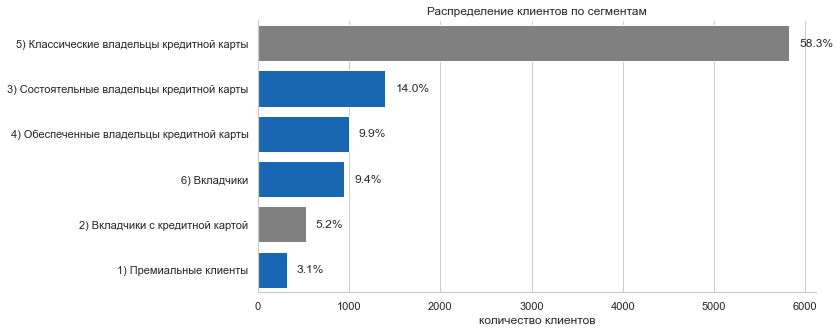

In [41]:
# распределение клиентов по сегментам (таблица + график)
segment_pivot = (
    df.groupby('segment')
      .agg({'user_id': 'count'})
      .sort_values(by='user_id', ascending=False)
      .reset_index()
      .rename(columns={'user_id': 'count'})
)

segment_pivot['count_ratio'] = segment_pivot['count'] / segment_pivot['count'].sum()

display(segment_pivot.style.format({'count_ratio': '{:.1%}'}))

plt.figure(figsize=(10,5))

sns.barplot(
    y='segment',
    x='count',
    data=segment_pivot,
    palette=['#808080','#0066CC','#0066CC','#0066CC','#808080','#0066CC']
)

plt.xlabel('количество клиентов')
plt.ylabel('')
plt.title('Распределение клиентов по сегментам')

for x,y,z in zip(segment_pivot['count_ratio'], range(len(segment_pivot)), segment_pivot['count']):
    label = '{:.1%}'.format(x)
    plt.annotate(label, # текст метки
                 (z,y), # координаты метки
                 textcoords="offset points", # позиция текста метки
                 xytext=(10,0), # расстояние между текстом и точкой координат метки
                 va='center') # выравнивание метки

plt.show()

segment,1) Премиальные клиенты,2) Вкладчики с кредитной картой,3) Состоятельные владельцы кредитной карты,4) Обеспеченные владельцы кредитной карты,5) Классические владельцы кредитной карты,6) Вкладчики
churn,,,,,,
0,0,524,1057,865,5801,316
1,314,0,339,129,27,628


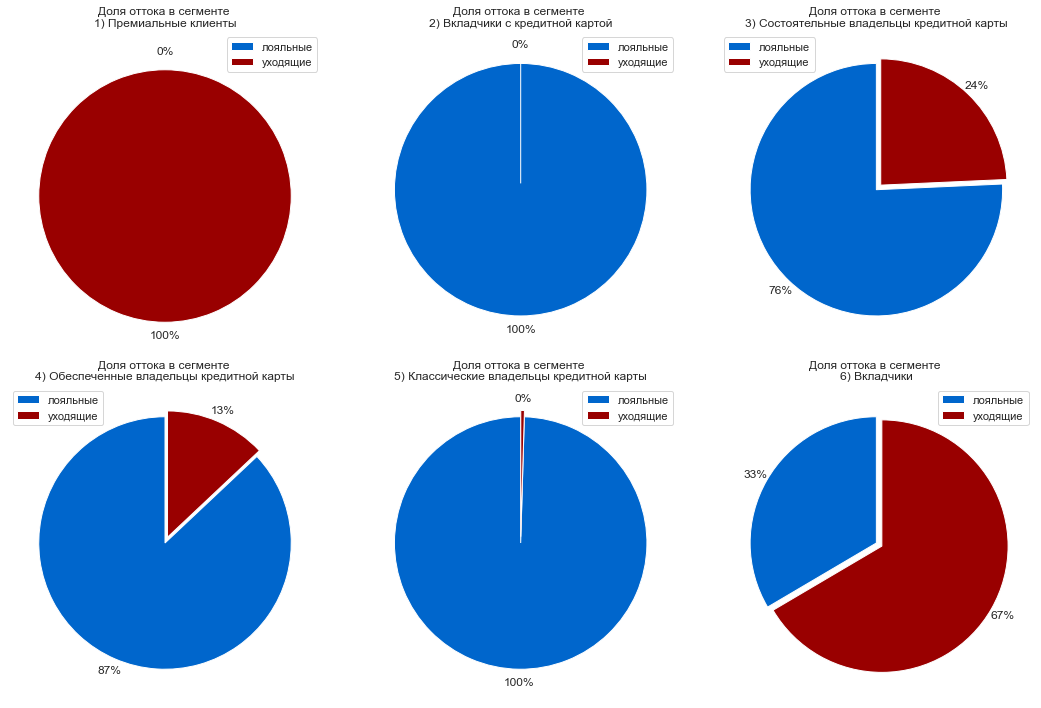

In [42]:
# доли оттока по сегментам
segment_pivot_1 = (
    df.pivot_table(
        index='churn',
        columns='segment',
        values='user_id',
        aggfunc='count',
        fill_value=0
    )
)

display(segment_pivot_1)

#строим графики
fig = plt.figure(figsize=(15,10))

for i in range(len(segment_pivot_1.columns)):
    axi = fig.add_subplot(2,3,i+1)
    plt.pie(
        x=segment_pivot_1.iloc[:,i],
        colors=('#0066CC', '#990000'),
        autopct='%1.0f%%',
        pctdistance=1.1,
        startangle=90,
        explode=(0, 0.05)
    )
    plt.title(f'Доля оттока в сегменте \n{segment_pivot_1.columns[i]}')
    plt.legend(['лояльные', 'уходящие'])
    
fig.tight_layout()
plt.show()

,segment,churn,churn_ratio
0,6) Вкладчики,628,43.7%
1,3) Состоятельные владельцы кредитной карты,339,23.6%
2,1) Премиальные клиенты,314,21.9%
3,4) Обеспеченные владельцы кредитной карты,129,9.0%
4,5) Классические владельцы кредитной карты,27,1.9%


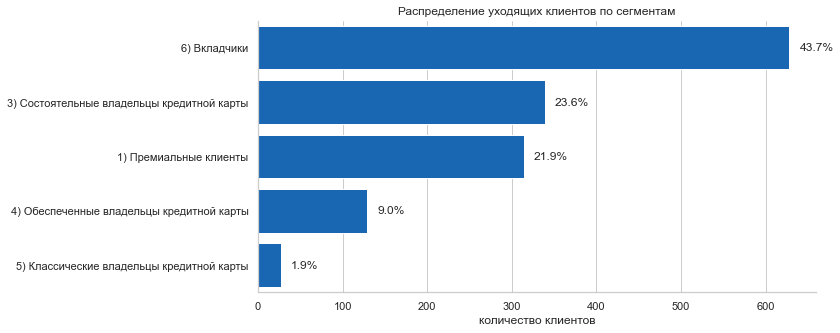

In [43]:
# сегменты клиентов, формирующие отток

segment_pivot_2 = (
    df.query('churn == 1')
      .groupby('segment')
      .agg({'user_id': 'count'})
      .sort_values(by='user_id', ascending=False)
      .reset_index()
      .rename(columns={'user_id': 'churn'})
)

segment_pivot_2['churn_ratio'] = segment_pivot_2['churn'] / segment_pivot_2['churn'].sum()

display(segment_pivot_2.style.format({'churn_ratio': '{:.1%}'}))

plt.figure(figsize=(10,5))

sns.barplot(
    y='segment',
    x='churn',
    data=segment_pivot_2,
    color='#0066CC'
)

plt.xlabel('количество клиентов')
plt.ylabel('')
plt.title('Распределение уходящих клиентов по сегментам')

for x,y,z in zip(segment_pivot_2['churn_ratio'], range(len(segment_pivot_2)), segment_pivot_2['churn']):
    label = '{:.1%}'.format(x)
    plt.annotate(label, # текст метки
                 (z,y), # координаты метки
                 textcoords="offset points", # позиция текста метки
                 xytext=(10,0), # расстояние между текстом и точкой координат метки
                 va='center') # выравнивание метки

plt.show()

## Проверка статистических гипотез

### Сравнение дохода между клиентами с 1 и 2 продуктами

Есть предположение, что у клиентов с одним и двумя продуктами различаются доходы. Посмотрим на средние и медианные доходы по группам клиентов:

In [44]:
# строим сводную таблицу для оценки размера выборок,
# средних значений зарплаты, ее дисперсий по двум группам клиентов
df.query('products == 1 or products == 2') \
  .groupby('products') \
  .agg({'user_id': 'count', 'salary': [np.mean, np.var]}) \
  .style.format('{:.0f}')

Видим, что средние доходы по группам клиентов сильно отличаются друг от друга: доход клиентов с 1 продуктом почти в 2 раза выше, чем у клиентов с 1 продуктом. Выборочные дисперсии также сильно отличаются, как и размеры выборок. Кроме этого в выборке клиентов с 2 продуктами всего 524 клиента, а в данных о заработной плате присутствуют выбросы. Слишком много фактов не в пользу T-теста, поэтому гипотезу о равенстве средних будем проверять критерием Манна-Уитни: он хорошо работает на выборках небольших объемов и устойчив к выбросам и может применяться к разным типам распределений переменной (у нас распределение зарплаты, как мы помним, отличается от нормального и имеет очень длинный правый хвост). Тест будем применять в вариации для независимых выборок, и он будет двусторонний, т.к. нет условия об оценке отклонения дохода в конкретную сторону.

Сформулируем гипотезы для проверки принимая во внимание то, что нулевая гипотеза должна содержать условие равенства:

**H0:** Средние доходы клиентов с 1 продуктом и клиентов с 2 продуктами одинаковы.

**H1:** Средние доходы клиентов с 1 продуктом и клиентов с 2 продуктами различаются.

In [45]:
# проверка гипотезы о равенстве средних
# двусторонним тестом Манна-Уитни для независимых выборок

# сохраняем выборки с размером зарплаты в отдельных переменных по группам клиентов
salary_1_product = df.query('products == 1')['salary']
salary_2_product = df.query('products == 2')['salary']

# задаем уровень статистической значимости
alpha = .05 

# запускаем тест и сохраняем результаты
stat, p_value = mannwhitneyu(salary_1_product, salary_2_product, alternative='two-sided')

print('p-значение:', '{:0.3f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между показателями есть значимая разница')
else:
    print('Не получилось отвергнуть нулевую гипотезу: нет оснований считать показатели разными')

p-значение: 0.000
Отвергаем нулевую гипотезу: между показателями есть значимая разница


**Вывод**

На имеющихся данных на уровне значимости 5% есть основания отвергнуть нулевую гипотезу в пользу альтернативной. Это означает, что в среднем доходы клиентов с 1 и 2 продуктами различаются.

*P.S. А в чем смысл проверки такой гипотезы? Какую она пользу несет? На реальных данных, в принципе, невооруженным глазом было видно, что доходы клиентов с 1 продуктом больше...*

### Сравнение уровня оттока между клиентами банка разного возраста

В ходе исследовательского анализа данных не увидели большой разницы в оттоке у клиентов 30-39 лет и клиентов 50-59 лет, при этом традиционно считается, что более возрастные клиенты сложнее меняют свои привычки и, в целом, более осознанны в своем выборе. Сравнение оттоков в этих группах может быть дополнительным знанием для маркетологов при разработке целевых акций по удержанию клиентов.

Посмотрим на уровень оттока по группам:

In [46]:
# строим сводную таблицу для оценки размера выборок,
# и уровня оттока по двум группам клиентов
df.query("age_category == '30-39 лет' or age_category == '50-59 лет'") \
  .groupby('age_category') \
  .agg({'churn': ['count', 'mean']}) \
  .style.format({('churn', 'mean'):'{:.1%}'})

Выглядит так, что пропорции по оттоку равны. Проверку этой гипотезы проведем с помощью метода проверки пропорций на основе нормального (z) теста. Тест будет односторонним.

Сформулируем гипотезы для проверки принимая во внимание то, что нулевая гипотеза должна содержать условие равенства:

**H0:** Среди клиентов, намеревающихся уйти, доли клиентов 30-39 и 50-59 лет одинаковы.

**H1:** Среди клиентов, намеревающихся уйти, доля клиентов 30-39 лет больше, чем клиентов 50-59 лет.

In [47]:
# проверка гипотезы о равенстве долей
# односторонним тестом на основе нормального z-теста

# сохраняем число успехов для первой и второй групп
successes = [
    df.query("age_category == '30-39 лет' and churn == 1")['user_id'].count(),
    df.query("age_category == '50-59 лет' and churn == 1")['user_id'].count()
]

# сохраняем общее кол-во наблюдений для первой и второй групп
trials = [
    df.query("age_category == '30-39 лет'")['user_id'].count(),
    df.query("age_category == '50-59 лет'")['user_id'].count()
]

# задаем уровень статистической значимости
alpha = .05

# запускаем тест и сохраняем результаты
stat, p_value = proportions_ztest(successes, trials, alternative='larger')

print('p-значение: ', '{:0.3f}'.format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: доля в первой группе выше, чем во второй')
else:
    print('Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными')

p-значение:  0.430
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными


**Вывод**

На имеющихся данных на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу в пользу альтернативной. Это означает, что склонность к оттоку у клиентов 30-39 и 50-59 лет одинакова.

## Общие выводы и рекомендации

**Общие выводы**:

1. Изучены данные по 10 тысячам клиентов регионального банка, выполнена их предобработка. В целом, данные качественные и полные, а набор показателей достаточен для формирования общей картины

2. Проанализированы статистические показатели клиентской базы (данные не содержат аномальных значений):
    * основной бизнес сосредоточен в Ярославле (60% клиентов), поменьше клиентов в Рыбинске (27%) и Ростове (14%)
    * мужчин и женщин примерно поровну, средний возраст клиента 40 лет
    * в основном, клиенты пользуются только 1 продуктом, и 84% из них имеют кредитную карту
    * активна в последнее время половина клиентской базы
    * по показателям заработной платы и баланса собственных средств тоже нет неожиданностей: присутствуют очень обеспеченные клиенты
    * 14% клиентов заявили о намерении прекратить обсуживание - это целевой показатель нашего исследования.
    
3. Сформированы портреты типичных представителей уходящих и лояльных клиентов: уходящие клиенты моложе, более состоятельны, имеют больше шансов получить кредит, при этом реже являются владельцами кредитных карт банка, в среднем имеют больше продуктов, остаток их собственных средств почти в 5 раз выше, чем у лояльных клиентов, и они намного активнее взаимодействуют с банком.

4. Определены признаки, наиболее сильно влияющие на отток: наличие кредитной карты, баллы кредитного скоринга, остаток собственных средств, возраст клиента. В зоне риска по оттоку находятся клиенты, обладающие одним или несколькими из следующих признаков:
    * использование только одного банковского продукта
    * отсутствие кредитной карты
    * балл кредитного скоринга больше 640
    * остаток собственных средств от 350 тыс.руб.
    * возрастные диапазоны до 30 лет, 30-39 лет и 50-59 лет.
    
5. Проведена сегментация пользователей по потреблению и описаны портреты типичных представителей 6 основных сегментов:
* **Премиальные клиенты - высокоотточный сегмент** - клиенты с высокими показателям финансовой состоятельности, находящиеся на комплексном обслуживании в банке. Их доля 3% от общей численности клиентов. Имеют 3-4 продукта и максимальный уровень неудовлетворенности: о намерении уйти заявили все клиенты.
* **Состоятельные владельцы кредитной карты - высокооточный сегмент** - 14% клиентской базы, имеют кредитную карту с большим остатком собственных средств, с вреднем 782 тыс.руб. Отток в сегменте 24%.
* **Вкладчики - высокоотточный сегмент** - 10% общей базы, клиенты с 1 вкладом на среднюю сумму 969 тыс.руб., в отток уходят 67% из них.
* **Обеспеченные владельцы кредитных карт - сегмент в зоне риска** - около 10% клиентской базы. Имеют кредитнкую карту с достойным остаком собственных средств, в среднем 193 тыс.руб. Отток в сегменте 13%.
* **Вкладчики с кредитной картой - лояльный сегмент** - низкодоходные клиенты с 2 продуктами, нацеленные на сбережение и экономные траты. Оттока в сегменте нет.
* **Классические владельцы кредитных карт - лояльный сегмент** - клиенты с хорошими доходами, не настроенные размещать свободные средства в нашем банке. Оттока в сегменте нет.

6. Проверены две статистические гипотезы:
* установлена статистическая значимость различия средних доходов по клиентам, пользующимся 2 продуктами и клиентам с 1 продуктом
* установлено отсутствие статитической значимости между долями клиентов, уходящих в отток в общей численности клиентов по двум возрастным категориям 30-39 и 50-59 лет.



**Общие рекомендации по удержанию клиентов:**

В ходе исследования становится понятным, что 14%-ный отток в банке обусловлен проблемами в продуктах. В первую очередь, маркетологам и продакт-менеджерам необходимо уделить **внимание линейке вкладов**. Возможно, она была изменена, и условия оказались непривлекательными для клиентов. Необходимо провести анализ процентных ставок в сравнении с основными конкурентами и срочно модифицировать линейку вкладов с учетом нескольких условий:
* конкурентоспособные процентные ставки в комбинации с разными по условиям досрочного погашения видами вкладов: жесткая ставка "досрочки" - повышенный процент, гибкая ставка "досрочки" - процент ниже. Это позволить покрыть потребности как клиентов, нацеленных на преумножение, так и тех клиентов, кто сомневается в отсутствии риска по размещению крупных сумм на длительные сроки.
* повышенные ставки при крупных суммах вкладов - дополнительная ценность для обеспеченных клиентов.

Также необходимо модифицировать **условия использования кредитных карт**:
* исследовать лимиты/комиссии по наличным операциям и предусмотреть если не общее изменение условий, то какие-то отдельные льготы: например, возможность 1 раз в месяц увеличить лимит снятия собственных средств или снятие собственных средств до определенного лимита в месяц без комиссии (если есть комиссия)
* доработать имеющуюся/разработать гибкую схему кэшбека по безналичным операциям с возможностью выбора 2-3 категорий с повышенным кэшбеком для учета различающихся потребностей клиентов разного возраста: например, для клиентов до 30 лет - развлечения/путешествия/кафе и рестораны/фитнес, для клиентов 30-39 лет - образование/детские товары и т.д.

**Мероприятия по сдерживанию текущего оттока**

* **Премиальные клиенты** - взять сегмент на индивидуальную проработку. Выяснить основные причины ухода, предложить приемлемые и для клиента, и для банка условия обслуживания вкладов вплоть до **индивидуальных ставок**. Такие клиенты ценны для банка, в первую очередь, своими накоплениями, поэтому можно пойти не только на изменение условий вкладов, но и на снижение комиссий по другим продуктам.
* **Вкладчики** - заинтересовать клиентов перспективой скорого изменения условия вкладов (поможет задержать тех, кто в целом к банку лоялен, но текущие условия совершенно неприемлемы), провести опрос предпочтений по видам вкладов (покажет ценность мнения клиента, даст варианты модификации линейки). Также предложить **бесплатное открытие кредитной карты с льготным периодом на сумму вклада**, объяснив все прелести такого подхода к сбережениям/тратам (для банка это дополнительная прочность связи с клиентом)
* **Состоятельные владельцы кредитной карты** - также заинтересовать изменением условий как по вкладам, так и по условиям использования кредитных карт, провести опрос предпочтений, подчеркнуть, что в новой линейке вкладов будут повышенные ставки для крупных сумм вкладов. Также предложить клиентам **автоматическое повышение лимита по кредитной карте до размера будущего вклада**.
* **Обеспеченные владельцы кредитных карт** - хотя это и не самый отточный сегмент, но превентивные мероприятия надо проводить уже сейчас. Основной упор здесь будем делать на **анонс скорых изменений** в линейке вкладов и условиях обслуживания кредитных карт.